# TD 1 — Introduction to Qiskit and Quantum Circuits

> **Goal of this TD**
>
> * Learn the basic syntax of Qiskit
> * Understand how quantum circuits are built, executed, and measured
> * Actively modify and test circuits

---

## 0. Environment setup (run this cell first)

In [1]:
!pip install -q qiskit qiskit-aer qiskit-ibm-runtime pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00


Verify the installation:

In [2]:
import qiskit
print("Qiskit version:", qiskit.__version__)

Qiskit version: 2.3.0


---

## 1. Your first quantum circuit

A quantum circuit is created using the `QuantumCircuit` class.

In [3]:
from qiskit import QuantumCircuit

# One qubit, one classical bit
qc = QuantumCircuit(1, 1)
qc.measure(0,0)

Each qubit is initialized in the state |0⟩.

---

## 2. Single-qubit gates

### X followed by Hadamard

In [4]:
qc_xh = QuantumCircuit(1,1)# TODO
qc_xh.x(0)
qc_xh.h(0)
qc_xh.measure(0,0) # Measure qubit 0 and store the measurement on bit 0

**Prediction:**

* What measurement outcomes do you expect?

---

## 3. Executing circuits with the Simulator (measurement statistics)


In [5]:
from qiskit_aer import AerSimulator
from qiskit import transpile

simulator = AerSimulator()

tqc = transpile(qc_xh, simulator)
result = simulator.run(tqc, shots=1000).result()
counts = result.get_counts()

print(counts)

def Simulator(qc,shots):
  simulator = AerSimulator()

  tqc = transpile(qc, simulator)
  result = simulator.run(tqc, shots=shots).result()
  counts = result.get_counts()
  return counts #dictionary

{'0': 513, '1': 487}


In [6]:
qc_xh# TODO

### Histogram

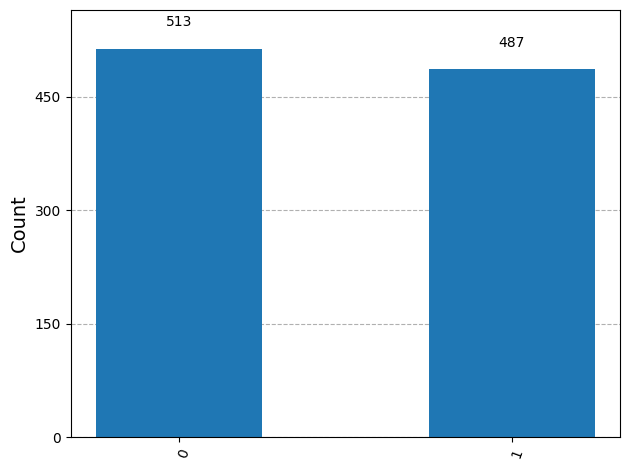

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

**Question:** Why are the probabilities close to 50/50?

---

## 4. Circuit visualization

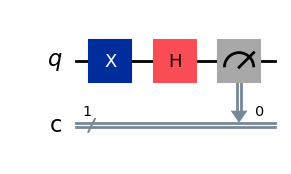

In [8]:
qc_xh.draw(output="mpl", style="iqp")

Try visualizing the other circuits as well.

---

## 5. Statevector simulation

In [12]:
from qiskit_aer import StatevectorSimulator

simulator = StatevectorSimulator()
#result = simulator.run(qc_xh).result()
#statevector = result.get_statevector()
def SV_Simulator(qc):
  simulator = StatevectorSimulator()
  result = simulator.run(qc_xh).result()
  statevector = result.get_statevector()
  return statevector #complex array
statevector = SV_Simulator(qc)

---

## 6. Bloch sphere representation

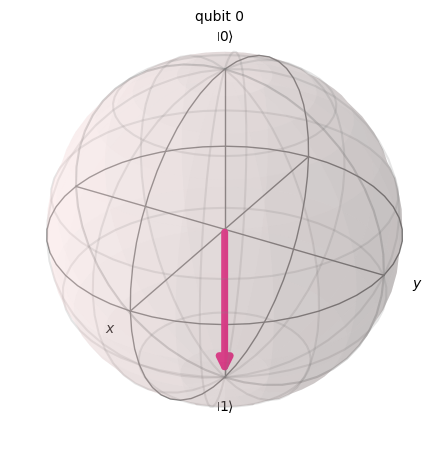

In [13]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)


**Question:** Where is the state located on the Bloch sphere?


In [14]:
# Ex 10
qc10_c = QuantumCircuit(2,2)
qc10_c.h(0)
qc10_c.h(1)
qc10_c.x(1)
qc10_c.measure([0,1],[0,1])

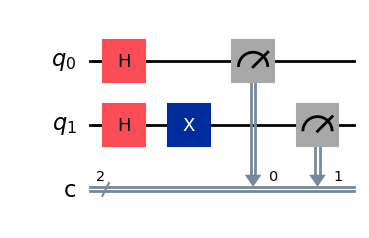

In [15]:
qc10_c.draw(output="mpl", style="iqp")

In [16]:
print(Simulator(qc10_c,100))

{'01': 25, '11': 27, '10': 21, '00': 27}


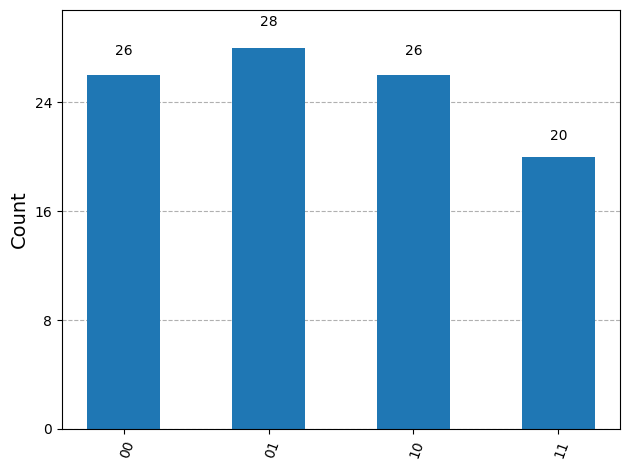

In [17]:
plot_histogram(Simulator(qc10_c,100))

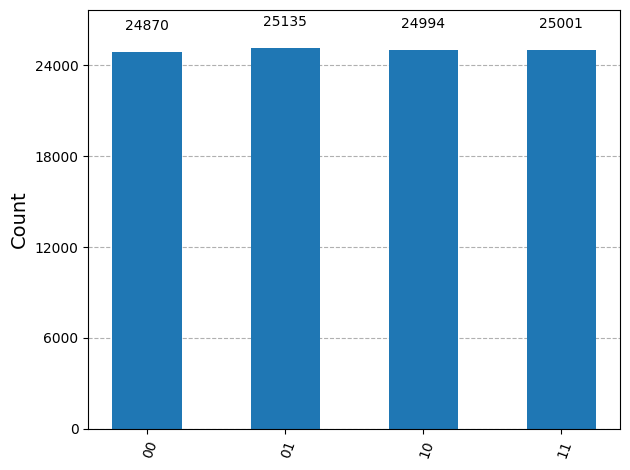

In [18]:
plot_histogram(Simulator(qc10_c,100000))

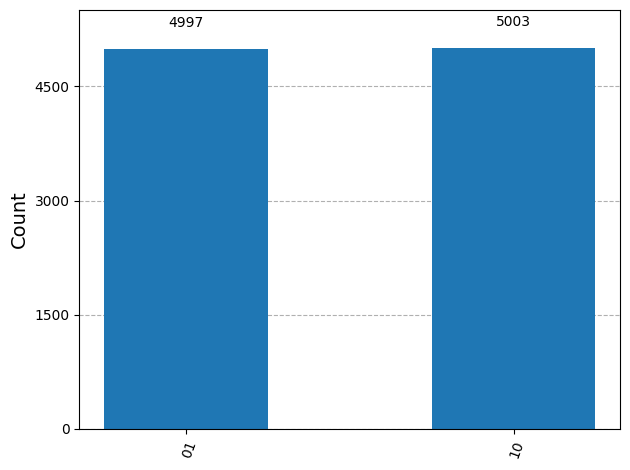

In [19]:
#Ex : 11
from qiskit import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
def Simulator(qc,shots):
  simulator = AerSimulator()

  tqc = transpile(qc, simulator)
  result = simulator.run(tqc, shots=shots).result()
  counts = result.get_counts()
  return counts #dictionary

def SV_Simulator(qc):
  simulator = StatevectorSimulator()
  result = simulator.run(qc).result()
  statevector = result.get_statevector()
  return statevector #complex array

qc_ex11 = QuantumCircuit(2,2)
qc_ex11.h(0)
qc_ex11.x(1)
qc_ex11.cx(0,1)
qc_ex11.measure(0,0)
qc_ex11.measure(1,1)
counts_ex11 = Simulator(qc_ex11,shots=10000)

plot_histogram(counts_ex11)
# We get Bell states

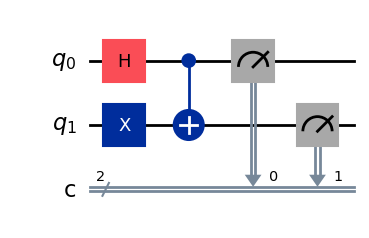

In [20]:
qc_ex11.draw(output="mpl", style="iqp")

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


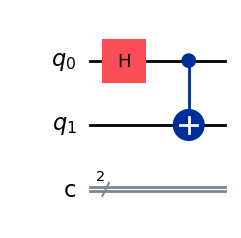

In [21]:
qc_phi1 = QuantumCircuit(2,2)
qc_phi1.h(0)
qc_phi1.cx(0,1)
print(SV_Simulator(qc_phi1))
qc_phi1.draw(output="mpl", style="iqp")

Statevector([ 0.70710678+0.j,  0.        +0.j, -0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


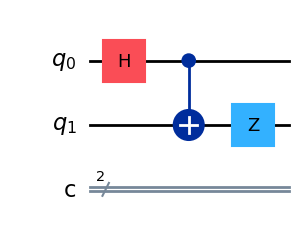

In [22]:
qc_phi2 = QuantumCircuit(2,2)
qc_phi2.h(0)
qc_phi2.cx(0,1)
qc_phi2.z(1)
print(SV_Simulator(qc_phi2))
qc_phi2.draw(output="mpl", style="iqp")

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


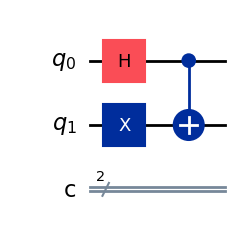

In [23]:
qc_psi1 = QuantumCircuit(2,2)
qc_psi1.h(0)
qc_psi1.x(1)
qc_psi1.cx(0,1)
print(SV_Simulator(qc_psi1))
qc_psi1.draw(output="mpl", style="iqp")

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
             -0.        +0.j],
            dims=(2, 2))


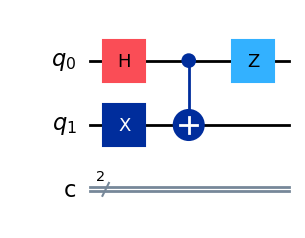

In [24]:
qc_psi2 = QuantumCircuit(2,2)
qc_psi2.h(0)
qc_psi2.x(1)
qc_psi2.cx(0,1)
qc_psi2.z(0)
print(SV_Simulator(qc_psi2))
qc_psi2.draw(output="mpl", style="iqp")

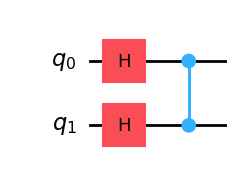

In [25]:
# Ex 12

qc_ex12 = QuantumCircuit(2)
qc_ex12.h([0,1])
qc_ex12.cz(0,1)
qc_ex12.draw(output="mpl", style="iqp")

In [26]:
print(SV_Simulator(qc_ex12))

Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


# TP 3
## Ex:1
Quantum Teleportation

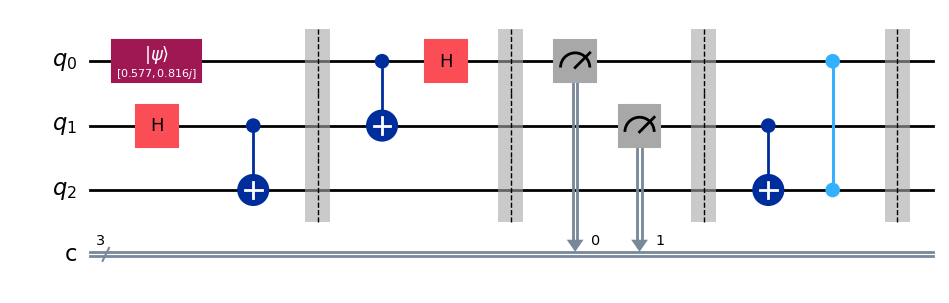

In [27]:
from qiskit import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
def Simulator(qc,shots):
  simulator = AerSimulator()

  tqc = transpile(qc, simulator)
  result = simulator.run(tqc, shots=shots).result()
  counts = result.get_counts()
  return counts #dictionary

def SV_Simulator(qc):
  simulator = StatevectorSimulator()
  result = simulator.run(qc).result()
  statevector = result.get_statevector()
  return statevector #complex array

qc_teleport = QuantumCircuit(3,3)
# Preparation
state = [1/3**0.5,(2/3)**0.5*1j]
qc_teleport.initialize(state,0) # initialize the message to be teleported
qc_teleport.h(1)
qc_teleport.cx(1,2)
qc_teleport.barrier()
qc_teleport.cx(0,1)
qc_teleport.h(0)
qc_teleport.barrier()
qc_teleport.measure([0,1],[0,1])
qc_teleport.barrier()
# Communication
qc_teleport.cx(1,2)
qc_teleport.cz(0,2) # Count for Z corrections
qc_teleport.barrier()
#qc_teleport.measure(2,2)
qc_teleport.draw(output="mpl", style="iqp")

In [28]:
print(SV_Simulator(qc_teleport))

Statevector([0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             0.00000000e+00+0.j        , 5.77350269e-01+0.j        ,
             0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             0.00000000e+00+0.j        , 9.99919924e-17+0.81649658j],
            dims=(2, 2, 2))


In [29]:
print(state)

[0.5773502691896258, 0.816496580927726j]


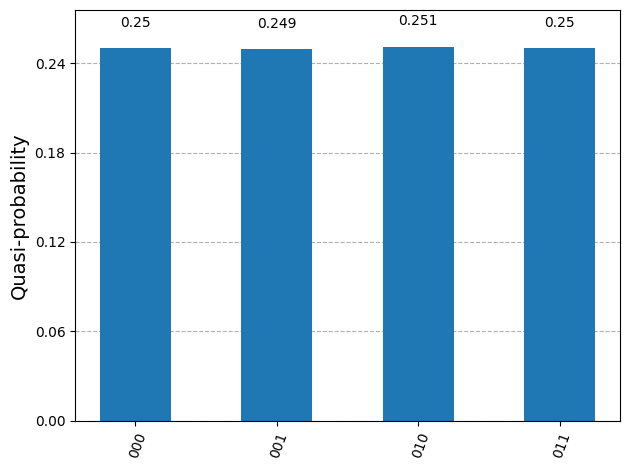

In [31]:
result_teleport = Simulator(qc_teleport,1e5)
result_teleport_Normalized = {}
for item,value in result_teleport.items():
  result_teleport_Normalized[item] = result_teleport[item]/1e5

plot_histogram(result_teleport_Normalized)

In [32]:
print(result_teleport)

{'001': 24925, '011': 24993, '000': 25020, '010': 25062}


We don't count for Z corrections because we measure the state of Bob at the end